In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/deu.txt',delimiter='\t',header=None)

In [3]:
df.head()

,0,1,2
0,Go.,Geh.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Hi.,Hallo!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
2,Hi.,Grüß Gott!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
3,Run!,Lauf!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run.,Lauf!,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


In [4]:
df.columns=['English','German','Attributes']

In [5]:
df=df.drop(['Attributes'],axis=1)

In [6]:
df.head()

,English,German
0,Go.,Geh.
1,Hi.,Hallo!
2,Hi.,Grüß Gott!
3,Run!,Lauf!
4,Run.,Lauf!


In [7]:
df.isnull().sum()

,0
English,0
German,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277891 entries, 0 to 277890
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  277891 non-null  object
 1   German   277891 non-null  object
dtypes: object(2)
memory usage: 4.2+ MB


In [9]:
df.shape

(277891, 2)

In [10]:
df.duplicated().sum()

0

In [11]:
from wordcloud import WordCloud

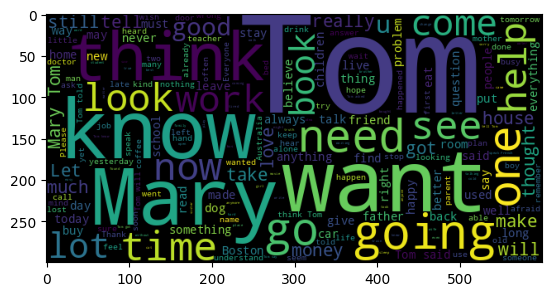

In [12]:
wc = WordCloud(width=600,height=300).generate(' '.join(df.English))
plt.imshow(wc);

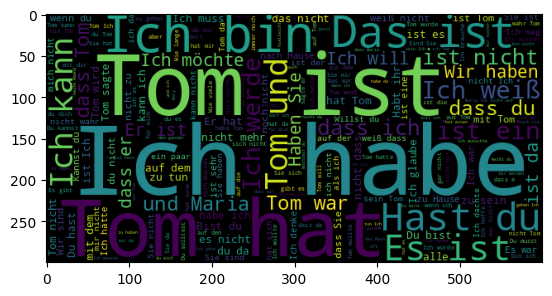

In [13]:
wc = WordCloud(width=600,height=300).generate(' '.join(df.German))
plt.imshow(wc);

In [14]:
import spacy
import re


def clean_text(x):
    puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#',
              '*', '+', '\\', '•', '~', '@', '£',
              '·', '_', '{', '}', '©', '^', '®', '`', '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â',
              '█', '½', 'à', '…',
              '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―',
              '¥', '▓', '—', '‹', '─',
              '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸',
              '¾', 'Ã', '⋅', '‘', '∞',
              '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
              '¹', '≤', '‡', '√', ]

    x = str(x)
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
    return x


def remove_names(x):
    for word in x.split():
        if word[0] == "@":
            x = x.replace(word, "")
    return x


def remove_url(x):
    result = re.sub(r"http\S+", "", x)
    return result


def handle_unicode(x):
    x = x.decode('utf-8')
    return x

def replace_special_chars(x):
    new_text=re.sub(r"[^a-zA-Z0-9 ]"," ",x)
    return new_text

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
stop_german=stopwords.words('german')

In [17]:
df['English'] = df['English'].apply(lambda x: remove_url(x))
df['English'] = df['English'].apply(lambda x: replace_special_chars(x))
df['English'] = df['English'].apply(lambda x: remove_names(x))
df['English'] = df['English'].apply(lambda x: clean_text(x))
df['English'] = df['English'].str.lower()
df['English'] = df['English'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [18]:
df['German'] = df['German'].apply(lambda x: remove_url(x))
df['German'] = df['German'].apply(lambda x: replace_special_chars(x))
df['German'] = df['German'].apply(lambda x: remove_names(x))
df['German'] = df['German'].apply(lambda x: clean_text(x))
df['German'] = df['German'].str.lower()
df['German'] = df['German'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_german)]))
df

,English,German
0,go,geh
1,hi,hallo
2,hi,gr gott
3,run,lauf
4,run,lauf
...,...,...
277886,someone know background says sound like native...,jemand wei woher kommt sagt erwecke eindruck m...
277887,someone know background says sound like native...,jemandem wei woher kommt gesagt klinge mutters...
277888,may impossible get completely error free corpu...,wohl unm glich vollkommen fehlerfreien korpus ...
277889,know adding sentences native strongest languag...,wei wohl ausschlie liche beitragen s tzen mutt...


In [19]:
df['English'] = df['English'].apply(lambda x: f"<start> {x} <end>")
df['German'] = df['German'].apply(lambda x: f"<start> {x} <end>")

In [20]:
df['eng_len'] = df.English.apply(len)
df['deu_len'] = df.German.apply(len)

In [21]:
df.head()

,English,German,eng_len,deu_len
0,<start> go <end>,<start> geh <end>,16,17
1,<start> hi <end>,<start> hallo <end>,16,19
2,<start> hi <end>,<start> gr gott <end>,16,21
3,<start> run <end>,<start> lauf <end>,17,18
4,<start> run <end>,<start> lauf <end>,17,18


<ipython-input-22-cf65f4d5de00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.eng_len,ax=axes[0])
<ipython-input-22-cf65f4d5de00>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.deu_len,ax=axes[1])


<Axes: xlabel='deu_len', ylabel='Density'>

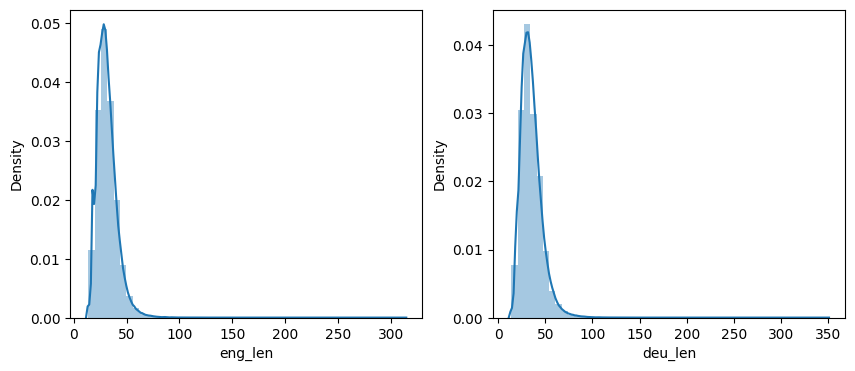

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.distplot(df.eng_len,ax=axes[0])
sns.distplot(df.deu_len,ax=axes[1])

In [23]:
max(df.eng_len),max(df.deu_len)

(312, 348)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [25]:
latent_dim = 256
num_samples = 15000  # Number of sentence pairs to use
max_input_length = 50  # Max length of input sentences
max_target_length = 50

In [27]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
import numpy as np

In [28]:
eng_tokenizer = {}  # Vocabulary for English
eng_sequences = []


for sentence in df['English']:
    tokens = text_to_word_sequence(sentence)
    for token in tokens:
        if token not in eng_tokenizer:
            eng_tokenizer[token] = len(eng_tokenizer) + 1
    eng_sequences.append([eng_tokenizer[token] for token in tokens])



In [29]:
ger_tokenizer = {}  # Vocabulary for German
ger_sequences = []
for sentence in df['German']:
    tokens = text_to_word_sequence(sentence)
    for token in tokens:
        if token not in ger_tokenizer:
            ger_tokenizer[token] = len(ger_tokenizer) + 1
    ger_sequences.append([ger_tokenizer[token] for token in tokens])



In [30]:
eng_sequences = pad_sequences(eng_sequences, maxlen=max_input_length, padding='post')
ger_sequences = pad_sequences(ger_sequences, maxlen=max_target_length, padding='post')

In [34]:
# Vocabulary sizes
num_encoder_tokens = len(eng_tokenizer) + 1  # Adding 1 for padding/unknown token
num_decoder_tokens = len(ger_tokenizer) + 1  # Adding 1 for padding/unknown token


In [33]:
df.head()

,English,German,eng_len,deu_len
0,<start> go <end>,<start> geh <end>,16,17
1,<start> hi <end>,<start> hallo <end>,16,19
2,<start> hi <end>,<start> gr gott <end>,16,21
3,<start> run <end>,<start> lauf <end>,17,18
4,<start> run <end>,<start> lauf <end>,17,18


In [35]:
encoder_input_data = eng_sequences
decoder_input_data = ger_sequences

In [36]:
decoder_target_data = np.zeros_like(decoder_input_data)
decoder_target_data[:, :-1] = decoder_input_data[:, 1:]


In [37]:
encoder_input_train, encoder_input_val, decoder_input_train, decoder_input_val, decoder_target_train, decoder_target_val = train_test_split(
    encoder_input_data, decoder_input_data, decoder_target_data, test_size=0.3, random_state=42
)

In [38]:
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(num_encoder_tokens, latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

In [39]:
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(num_decoder_tokens, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [40]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [41]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')
model.summary()

batch_size = 128
epochs = 1

model.fit(
    [encoder_input_train, decoder_input_train],
    decoder_target_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([encoder_input_val, decoder_input_val], decoder_target_val),
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 256)      │      4,374,272 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 256)      │      9,212,416 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 256), (None,   │        525,312 │ embedding[0][0]        │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 256),    │        525,312 │ embedding_1[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 35986)    │      9,248,402 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,885,714 (91.12 MB)

 Trainable params: 23,885,714 (91.12 MB)

 Non-trainable params: 0 (0.00 B)

1520/1520 ━━━━━━━━━━━━━━━━━━━━ 460s 299ms/step - loss: 1.0686 - val_loss: 0.5223


In [42]:
encoder_model = Model(encoder_inputs, encoder_states)

In [43]:
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [44]:
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_embedding, initial_state=decoder_states_inputs
)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

In [45]:
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input sequence
    states_value = encoder_model.predict(input_seq)

    # Start with the start token
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = ger_tokenizer['<start>']

    # Stop condition initialization
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Predict output tokens and states
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Get the token with the highest probability
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = next((word for word, index in ger_tokenizer.items() if index == sampled_token_index), None)

        # Append the word to the decoded sentence
        if sampled_word and sampled_word != '<end>':
            decoded_sentence += ' ' + sampled_word

        # Exit condition: either hit max length or find the stop token
        if sampled_word == '<end>' or len(decoded_sentence.split()) > max_target_length:
            stop_condition = True

        # Update the target sequence
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence.strip()

In [ ]:
def decode_sequence(input_seq):
    # Encode the input sequence
    states_value = encoder_model.predict(input_seq)

    # Start with an empty target sequence of size 1 initialized to 0
    target_seq = np.zeros((1, 1))

    # Stop condition initialization
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Predict output tokens and states
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Debugging: Check output tokens shape and values
        print(f"Output tokens: {output_tokens}")

        # Get the token with the highest probability
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = ger_tokenizer.index_word.get(sampled_token_index, '')

        # Debugging: Check sampled index and word
        print(f"Sampled token index: {sampled_token_index}, Word: {sampled_word}")

        # Append the word to the decoded sentence
        if sampled_word:
            decoded_sentence += ' ' + sampled_word

        # Check for stop condition: Repeated or invalid predictions, or max length
        if (
            sampled_token_index == 0  # Model predicts padding or empty token
            or len(decoded_sentence.split()) > max_target_length  # Exceeds max length
        ):
            stop_condition = True

        # Update target sequence for next prediction
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence.strip()

In [ ]:
test_sentence = "hello, how are you?"

# Tokenize and pad the test sentence
test_sequence = eng_tokenizer.texts_to_sequences([test_sentence])
test_sequence = pad_sequences(test_sequence, maxlen=max_input_length, padding='post')

# Debugging: Check the test sequence
print(f"Test sequence: {test_sequence}")

# Get the translation
translation = decode_sequence(test_sequence)
print("Translation:", translation)

Test sequence: [[1477    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Output tokens: [[[9.9561834e-01 2.7056327e-04 1.4875853e-04 ... 4.3591793e-11
   3.8447689e-11 3.4236093e-11]]]
Sampled token index: 0, Word: 
Translation: 


In [ ]:
test_sentence = "hello, how are you?"

# Tokenize and pad the test sentence
test_sequence = eng_tokenizer.texts_to_sequences([test_sentence])
test_sequence = pad_sequences(test_sequence, maxlen=max_input_length, padding='post')

# Get the translation
translation = decode_sequence(test_sequence)
print("Translation:", translation)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Translation: 
